<a href="https://colab.research.google.com/github/kasprova/advanced_customer_analytics/blob/master/notebooks/feature_selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FEATURE SELECTION (update 2019-10-20)

### Mount dataset from Google Disk to Google Colab

In [1]:
#mount google drive to get access to the data
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!unzip -q "drive/My Drive/analytics/universal_features_manual_cat_201509_201608__.zip"

In [0]:
!ls drive/My\ Drive/analytics/

cluster_labels.parquet	DATA.zip
customer_analytics.zip	universal_features_manual_cat_191020_.zip


In [0]:
#libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (5,10)

#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.ensemble import ExtraTreesRegressor

In [0]:
universal_features = "universal_features_manual_cat_201509_201608__.parquet"
data = pd.read_parquet(universal_features)


In [8]:
data.columns

Index(['month_id', 'household_id', 'recency', 'frequency', 'monetary', 'churn',
       'discount_number__store_coupon', 'discount_value__store_coupon',
       'discount_number__manufacture_coupon',
       'discount_value__manufacture_coupon', 'discount_number__misc_credit',
       'discount_value__misc_credit', 'discount_number__xxx_credit',
       'discount_value__xxx_credit', 'discount_number__total',
       'discount_value__total', 'deposite_number__bottle',
       'deposite_value__bottle', 'return_number__bottle',
       'return_value__bottle', 'refund_number', 'refund_value',
       'cat_m_alco_tabacco_paid_amount_pcnt',
       'cat_m_baby_and_pets_paid_amount_pcnt', 'cat_m_baking_paid_amount_pcnt',
       'cat_m_diary_paid_amount_pcnt', 'cat_m_drinks_paid_amount_pcnt',
       'cat_m_grains_paid_amount_pcnt', 'cat_m_greens_paid_amount_pcnt',
       'cat_m_misc_paid_amount_pcnt', 'cat_m_prepared_food_paid_amount_pcnt',
       'cat_m_proteins_paid_amount_pcnt', 'cat_m_sause_paid_amo

**Feature Selection Technique: Feature Importance**

Target variable - 'monetary value'

In [0]:
#data preprocessing
ignore_list = ['month_id', 'household_id']
features = [c for c in data.columns if c not in ignore_list]

df = data.copy()

# transform from negative to positive values
df[['discount_value__manufacture_coupon',
 'discount_value__store_coupon',
 'discount_value__total',
 'refund_value',
 'return_value__bottle']] = - df[[
 'discount_value__manufacture_coupon',
 'discount_value__store_coupon',
 'discount_value__total',
 'refund_value',
 'return_value__bottle']]

#applying log(x+1) transformation for features containing 'money' value
df[['monetary']] = np.log1p(df[['monetary']])

#applying MinMaxScaler scaler
#scaler = MinMaxScaler()
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[features])
scaled_df = pd.DataFrame(scaled_df)
scaled_df.columns = features

In [0]:
#define target
X = pd.concat([scaled_df.iloc[:,0:2], scaled_df.iloc[:, 3:]], axis=1).values # except monetary
y = scaled_df.iloc[:,2].values #monetary
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [11]:
model = ExtraTreesRegressor()
model.fit(X,y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
                    oob_score=False, random_state=None, verbose=0,
                    warm_start=False)

In [12]:
print(model.feature_importances_)

[8.06924232e-02 8.11722425e-02 4.46780487e-03 2.72428416e-04
 2.88248690e-04 1.01026447e-03 1.05125543e-03 7.06138667e-04
 4.34284268e-04 2.87049313e-02 1.68049292e-02 1.67045530e-01
 2.54850178e-02 1.65858238e-02 8.52385515e-03 6.31598242e-05
 5.17678111e-05 2.71522294e-04 2.66236345e-04 5.32986525e-03
 6.16280728e-03 1.64070712e-02 7.03954501e-02 4.58418825e-02
 2.19369092e-02 5.38277987e-02 5.39365294e-02 1.03909197e-01
 7.60849912e-02 6.66424280e-02 1.40238693e-02 2.39116822e-02
 7.69165425e-03]


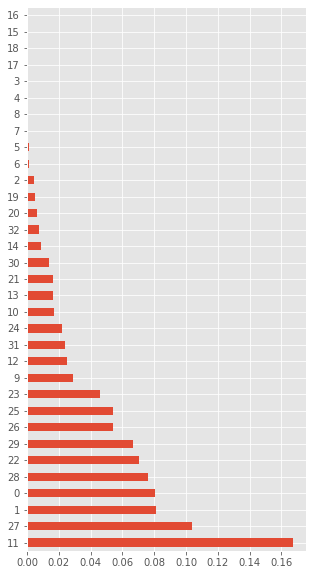

In [13]:
#plot graph of feature importances for better visualization
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = pd.Series(model.feature_importances_)
feat_importances.nlargest(25).plot(kind='barh')
plt.show()

In [17]:
feat_importances.nlargest(25).index

Int64Index([11, 27,  1,  0, 28, 22, 29, 26, 25, 23,  9, 12, 31, 24, 10, 13, 21,
            30, 14, 32, 20, 19,  2,  6,  5],
           dtype='int64')

In [0]:
index_list = feat_importances.nlargest(25).index
names_temp = [c for c in data.columns if c not in ['month_id', 'household_id', 'monetary']]
name_list = []
for i in index_list:
  name_list.append(names_temp[i])

In [19]:
name_list

['discount_number__total',
 'cat_m_prepared_food_paid_amount_pcnt',
 'frequency',
 'recency',
 'cat_m_proteins_paid_amount_pcnt',
 'cat_m_diary_paid_amount_pcnt',
 'cat_m_sause_paid_amount_pcnt',
 'cat_m_misc_paid_amount_pcnt',
 'cat_m_greens_paid_amount_pcnt',
 'cat_m_drinks_paid_amount_pcnt',
 'discount_number__xxx_credit',
 'discount_value__total',
 'duration_since_start__months',
 'cat_m_grains_paid_amount_pcnt',
 'discount_value__xxx_credit',
 'deposite_number__bottle',
 'cat_m_baking_paid_amount_pcnt',
 'cat_m_sweets_paid_amount_pcnt',
 'deposite_value__bottle',
 'cards_number',
 'cat_m_baby_and_pets_paid_amount_pcnt',
 'cat_m_alco_tabacco_paid_amount_pcnt',
 'churn',
 'discount_value__manufacture_coupon',
 'discount_number__manufacture_coupon']